## 1. Mount Google Drive in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Navigate to the Directory in Google Drive:

In [ ]:
import os

project_path = '/content/drive/MyDrive/MyProject'  # Adjust the path according to your Drive structure
os.makedirs(project_path, exist_ok=True)  # Creates the directory if it doesn't exist
os.chdir(project_path)  # Changes the current working directory to the specified path


## 3. Clone the Repository into Drive

In [ ]:
!git clone https://github.com/Karunya2655/GroupB_ZZSC9020.git

fatal: destination path 'GroupB_ZZSC9020' already exists and is not an empty directory.


In [ ]:
!git pull origin main

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


## 4. Working with the Repository:
Whenever we start a new Colab session and want to work with this repository, we need to mount the Google Drive and navigate to the repository's diorectory again.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
repo_path ='/content/drive/MyDrive/MyProject/GroupB_ZZSC9020'  # Adjust the path according to your Drive structure
os.chdir(repo_path)

# Organising NSW Data
We will generate a ZIP file from the segmented part files of the forecast demand data for NSW. This process involves specifying a base filename for the final ZIP file and identifying the part files derived from the segmented data.

In [ ]:
base_filename = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip')
part_filenames = [
    os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip.partaa'),
    os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip.partab')
]

with open(base_filename, 'wb') as output_file:
    for part_filename in part_filenames:
        with open(part_filename, 'rb') as input_file:
            output_file.write(input_file.read())

if os.path.exists(base_filename):
    print(f"Successfully combined the parts into {base_filename}")
    # Extract the ZIP file
    import zipfile
    with zipfile.ZipFile(base_filename, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"Contents of {base_filename} have been extracted.")
else:
    print("Failed to combine ZIP parts.")

Successfully combined the parts into /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip
Contents of /content/drive/MyDrive/MyProject/GroupB_ZZSC9020/data/NSW/forecastdemand_nsw.csv.zip have been extracted.


Importing zipfile module which is necessary for handline ZIP archive files. It provides a set of tools to create, read, write, append, and list a ZIP file's contents. When working with ZIP files, such as compressing files into a ZIP archive or extracting files from a ZIP archive, this module becomes indispensable due to its comprehensive functionality and ease of use.

In [ ]:
import zipfile

## Extracting all data for NSW

In [ ]:
zip_forecastdemand_nsw = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv.zip')
zip_temperature_nsw = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv.zip')
zip_totaldemand_nsw = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv.zip')

extract_directory = os.path.join(repo_path, 'data/NSW/')

for zip_file in [zip_forecastdemand_nsw, zip_temperature_nsw, zip_totaldemand_nsw]:
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_directory)
            print(f"Extracted {zip_file} into {extract_directory}")
    else:
        print(f"The file {zip_file} does not exist.")

NameError: name 'zipfile' is not defined

In [ ]:
import pandas as pd
import numpy as np

Locate and load the datasets and displaying the first few rows of each dataframe to verify

In [ ]:
# Locate the data set
csv_forecast_nsw = os.path.join(repo_path, 'data/NSW/forecastdemand_nsw.csv')

# Temperature data from 2021-2024
csv_temperature_nsw = os.path.join(repo_path, 'data/NSW/temperature_nsw.csv')
csv_temperature_nsw_part2 = os.path.join(repo_path, 'data/NSW/historical_temp_data.csv')

# Demand data from 2012-2024
csv_totaldemand_nsw = os.path.join(repo_path, 'data/NSW/totaldemand_nsw.csv')
csv_totaldemand_nsw_part2 = os.path.join(repo_path, 'data/NSW/totaldemand_part2.csv')

# Load the datasets
df_forecast_nsw = pd.read_csv(csv_forecast_nsw)

df_temperature_nsw = pd.read_csv(csv_temperature_nsw)
df_temperature_nsw_part2 = pd.read_csv(csv_temperature_nsw_part2)

df_totaldemand_nsw = pd.read_csv(csv_totaldemand_nsw)
df_totaldemand_nsw_part2 = pd.read_csv(csv_totaldemand_nsw_part2)

# Display the first few rows of each dataframe to verify
print("Forecast Demand Head:")
print(df_forecast_nsw.head())

print("\nTemperature Data Head:")
print(df_temperature_nsw.head())

print("\nTemperature Part 2 Data Head:")
print(df_temperature_nsw_part2.head())

print("\nTotal Electricity Demand Head:")
print(df_totaldemand_nsw.head())

print("\nTotal Electricity Demand P2 Head:")
print(df_totaldemand_nsw_part2.head())

Forecast Demand Head:
   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2009123018     NSW1        71         7832.04  2009-12-30 12:31:49   
1        2009123019     NSW1        70         7832.04  2009-12-30 13:01:43   
2        2009123020     NSW1        69         7832.03  2009-12-30 13:31:36   
3        2009123021     NSW1        68         7832.03  2009-12-30 14:01:44   
4        2009123022     NSW1        67         7830.96  2009-12-30 14:31:35   

              DATETIME  
0  2010-01-01 00:00:00  
1  2010-01-01 00:00:00  
2  2010-01-01 00:00:00  
3  2010-01-01 00:00:00  
4  2010-01-01 00:00:00  

Temperature Data Head:
    LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6

Temperature Part 2 Data Head:
  Product code  Bureau of Meteorology station number

In [ ]:
# Load population data set
csv_population_nsw = os.path.join(repo_path, 'data/NSW/nsw_population.csv')
df_population_nsw = pd.read_csv(csv_population_nsw)
print("\nPopulation Head:")
print(df_population_nsw.head())
print("\nPopulation Tail:")
print(df_population_nsw.tail())


Population Head:
   year  population
0  1971     4725503
1  1972     4795106
2  1973     4841898
3  1974     4894053
4  1975     4932016

Population Tail:
    year  population
65  2036     9404886
66  2037     9498738
67  2038     9592466
68  2039     9686079
69  2040     9779573


## Electricity Demand
Append new data to original data set

In [ ]:
df_totaldemand_nsw['DATETIME'] = pd.to_datetime(df_totaldemand_nsw['DATETIME'],format='%d/%m/%Y %H:%M')

df_totaldemand_nsw_part2['DATETIME'] = pd.to_datetime(df_totaldemand_nsw_part2['DATETIME'],format='%Y/%m/%d %H:%M:%S')

In [ ]:
#checking the range of dates from each dataframe
df_totaldemand_nsw_part2 = df_totaldemand_nsw_part2.sort_values(by='DATETIME', ascending=True)

print("\nElectricity Demand Part 1 Tail:")
print(df_totaldemand_nsw.tail(5))
print("\nElectricity Demand Part 2 Head:")
print(df_totaldemand_nsw_part2.head(5))


Electricity Demand Part 1 Tail:
                  DATETIME  TOTALDEMAND REGIONID
196508 2021-03-17 22:00:00      7419.77     NSW1
196509 2021-03-17 22:30:00      7417.91     NSW1
196510 2021-03-17 23:00:00      7287.32     NSW1
196511 2021-03-17 23:30:00      7172.39     NSW1
196512 2021-03-18 00:00:00      7094.51     NSW1

Electricity Demand Part 2 Head:
                  DATETIME  TOTALDEMAND REGIONID
198816 2021-03-01 00:30:00      6947.85     NSW1
198817 2021-03-01 01:00:00      6769.28     NSW1
198818 2021-03-01 01:30:00      6499.29     NSW1
198819 2021-03-01 02:00:00      6336.15     NSW1
198820 2021-03-01 02:30:00      6243.42     NSW1


In [ ]:
#just get records after 2021-03-18 00:00:00
df_totaldemand_nsw_part2 = df_totaldemand_nsw_part2[df_totaldemand_nsw_part2['DATETIME'] > '2021-03-18 00:00:00']
df_totaldemand_nsw_part2

,DATETIME,TOTALDEMAND,REGIONID
199632,2021-03-18 00:30:00,6906.74,NSW1
199633,2021-03-18 01:00:00,6733.61,NSW1
199634,2021-03-18 01:30:00,6443.75,NSW1
199635,2021-03-18 02:00:00,6226.25,NSW1
199636,2021-03-18 02:30:00,6109.74,NSW1
...,...,...,...
264283,2024-02-29 23:40:00,8400.71,NSW1
264284,2024-02-29 23:45:00,8242.18,NSW1
264285,2024-02-29 23:50:00,8350.55,NSW1
264286,2024-02-29 23:55:00,8256.00,NSW1


In [ ]:
#Join the two demand dataframes
df_totaldemand_nsw = pd.concat([df_totaldemand_nsw, df_totaldemand_nsw_part2])
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
264283,2024-02-29 23:40:00,8400.71,NSW1
264284,2024-02-29 23:45:00,8242.18,NSW1
264285,2024-02-29 23:50:00,8350.55,NSW1
264286,2024-02-29 23:55:00,8256.00,NSW1


Cut-off data on last reading of 2023

In [ ]:
#df_totaldemand_nsw['DATETIME'] = pd.to_datetime(df_totaldemand_nsw['DATETIME'])
df_totaldemand_nsw = df_totaldemand_nsw[df_totaldemand_nsw['DATETIME'] < '2024-01-01 00:00:00']
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
198810,2023-12-31 23:35:00,6645.82,NSW1
198811,2023-12-31 23:40:00,6649.50,NSW1
198812,2023-12-31 23:45:00,6631.86,NSW1
198813,2023-12-31 23:50:00,6649.77,NSW1


## Temperature Data
Append new data to the original data set

In [ ]:
print("\nTemperature Part 1 Tail:")
print(df_temperature_nsw.tail(5))

print("\Temperature Demand Part 2 Head:")
print(df_temperature_nsw_part2.head(5))


Temperature Part 1 Tail:
         LOCATION         DATETIME  TEMPERATURE
220321  Bankstown  17/3/2021 23:00         19.1
220322  Bankstown  17/3/2021 23:20         19.0
220323  Bankstown  17/3/2021 23:30         18.8
220324  Bankstown  17/3/2021 23:34         18.8
220325  Bankstown   18/3/2021 0:00         18.6
\Temperature Demand Part 2 Head:
  Product code  Bureau of Meteorology station number  Year  Month  Day  \
0   IDCJAC0010                                 66137  1968      1    1   
1   IDCJAC0010                                 66137  1968      1    2   
2   IDCJAC0010                                 66137  1968      1    3   
3   IDCJAC0010                                 66137  1968      1    4   
4   IDCJAC0010                                 66137  1968      1    5   

   Maximum temperature (Degree C)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                      

In [ ]:
#drop unused columns, rename for consistency and remove earlier years
df_temperature_nsw_part2 = df_temperature_nsw_part2.drop(columns=['Product code',	'Bureau of Meteorology station number', 'Days of accumulation of maximum temperature', 'Quality'])
df_temperature_nsw_part2 = df_temperature_nsw_part2.rename(columns={
    'Year': 'year',
    'Month': 'month',
    'Day': 'day',
    'Maximum temperature (Degree C)': 'TEMPERATURE'
})
target_row = df_temperature_nsw_part2[(df_temperature_nsw_part2['year']== 2021) &
                            (df_temperature_nsw_part2['month'] == 3) &
                            (df_temperature_nsw_part2['day'] == 18)]

target_index = target_row.index
df_temperature_nsw_part2 = df_temperature_nsw_part2.loc[target_index[0]:]
print(df_temperature_nsw_part2.head(5))
print(df_temperature_nsw_part2.tail(5))

       year  month  day  TEMPERATURE
19435  2021      3   18         21.8
19436  2021      3   19         24.4
19437  2021      3   20         22.1
19438  2021      3   21         20.4
19439  2021      3   22         20.1
       year  month  day  TEMPERATURE
20536  2024      3   23         26.7
20537  2024      3   24         28.3
20538  2024      3   25         30.9
20539  2024      3   26         29.4
20540  2024      3   27         26.3


In [ ]:
#drop LOCATION columnn in part 1 temp data
df_temperature_nsw = df_temperature_nsw.drop(columns=['LOCATION'])
df_temperature_nsw

,DATETIME,TEMPERATURE
0,1/1/2010 0:00,23.1
1,1/1/2010 0:01,23.1
2,1/1/2010 0:30,22.9
3,1/1/2010 0:50,22.7
4,1/1/2010 1:00,22.6
...,...,...
220321,17/3/2021 23:00,19.1
220322,17/3/2021 23:20,19.0
220323,17/3/2021 23:30,18.8
220324,17/3/2021 23:34,18.8


In [ ]:
# Reformat original temperature data DATETIME to year, month, date

#convert from object to datetime
df_temperature_nsw["DATETIME"] = pd.to_datetime(df_temperature_nsw["DATETIME"], dayfirst=True)

df_temperature_nsw["year"] = df_temperature_nsw["DATETIME"].dt.year
df_temperature_nsw["month"] = df_temperature_nsw["DATETIME"].dt.month
df_temperature_nsw["day"] = df_temperature_nsw["DATETIME"].dt.day

df_temperature_nsw.head(5)

,DATETIME,TEMPERATURE,year,month,day
0,2010-01-01 00:00:00,23.1,2010,1,1
1,2010-01-01 00:01:00,23.1,2010,1,1
2,2010-01-01 00:30:00,22.9,2010,1,1
3,2010-01-01 00:50:00,22.7,2010,1,1
4,2010-01-01 01:00:00,22.6,2010,1,1


In [ ]:
#drop datetime
df_temperature_nsw = df_temperature_nsw.drop(columns=['DATETIME'])

# Move "TEMPERATURE" column to the last position
column_order = [col for col in df_temperature_nsw.columns if col != 'TEMPERATURE'] + ['TEMPERATURE']
df_temperature_nsw = df_temperature_nsw[column_order]
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,23.1
1,2010,1,1,23.1
2,2010,1,1,22.9
3,2010,1,1,22.7
4,2010,1,1,22.6
...,...,...,...,...
220321,2021,3,17,19.1
220322,2021,3,17,19.0
220323,2021,3,17,18.8
220324,2021,3,17,18.8


In [ ]:
#drop last row as only one measure from original dataset for this day, we will take the 18th from part 2 data
df_temperature_nsw = df_temperature_nsw.drop(df_temperature_nsw.index[-1])
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,23.1
1,2010,1,1,23.1
2,2010,1,1,22.9
3,2010,1,1,22.7
4,2010,1,1,22.6
...,...,...,...,...
220320,2021,3,17,19.5
220321,2021,3,17,19.1
220322,2021,3,17,19.0
220323,2021,3,17,18.8


Transform to have only one value per day, the max temp, to match with added part 2 dataset



In [ ]:
df_temperature_nsw = df_temperature_nsw.groupby(['year', 'month', 'day'])['TEMPERATURE'].max()
df_temperature_nsw = df_temperature_nsw.reset_index()
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
4086,2021,3,13,30.2
4087,2021,3,14,24.4
4088,2021,3,15,21.5
4089,2021,3,16,21.3


In [ ]:
# Join the two temperature datasets

df_temperature_nsw = pd.concat([df_temperature_nsw, df_temperature_nsw_part2])
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
20536,2024,3,23,26.7
20537,2024,3,24,28.3
20538,2024,3,25,30.9
20539,2024,3,26,29.4


Cut-off temperature data at last record of 2023

In [ ]:
df_temperature_nsw = df_temperature_nsw[df_temperature_nsw['year'] < 2024]
df_temperature_nsw

,year,month,day,TEMPERATURE
0,2010,1,1,28.8
1,2010,1,2,29.4
2,2010,1,3,21.5
3,2010,1,4,23.9
4,2010,1,5,27.7
...,...,...,...,...
20449,2023,12,27,27.1
20450,2023,12,28,31.2
20451,2023,12,29,26.7
20452,2023,12,30,27.9


In [ ]:
#adding complete date field
df_temperature_nsw = df_temperature_nsw.copy() # Work with the copy of the DataFrame
df_temperature_nsw['date'] = pd.to_datetime(df_temperature_nsw[['year', 'month', 'day']])
df_temperature_nsw

,year,month,day,TEMPERATURE,date
0,2010,1,1,28.8,2010-01-01
1,2010,1,2,29.4,2010-01-02
2,2010,1,3,21.5,2010-01-03
3,2010,1,4,23.9,2010-01-04
4,2010,1,5,27.7,2010-01-05
...,...,...,...,...,...
20449,2023,12,27,27.1,2023-12-27
20450,2023,12,28,31.2,2023-12-28
20451,2023,12,29,26.7,2023-12-29
20452,2023,12,30,27.9,2023-12-30


## Complete Datasets
Here we have complete data sets for Temperature, total demand and Population

In [ ]:
# Temperature: df_temperature_nsw (2010-01-01 to 2023-12-31)
df_temperature_nsw

,year,month,day,TEMPERATURE,date
0,2010,1,1,28.8,2010-01-01
1,2010,1,2,29.4,2010-01-02
2,2010,1,3,21.5,2010-01-03
3,2010,1,4,23.9,2010-01-04
4,2010,1,5,27.7,2010-01-05
...,...,...,...,...,...
20449,2023,12,27,27.1,2023-12-27
20450,2023,12,28,31.2,2023-12-28
20451,2023,12,29,26.7,2023-12-29
20452,2023,12,30,27.9,2023-12-30


In [ ]:
# Electricity Demand: df_totaldemand_nsw (2010-01-01 to 2023-12-31)
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
198810,2023-12-31 23:35:00,6645.82,NSW1
198811,2023-12-31 23:40:00,6649.50,NSW1
198812,2023-12-31 23:45:00,6631.86,NSW1
198813,2023-12-31 23:50:00,6649.77,NSW1


In [ ]:
# Population: df_population_nsw (1971 to 2040)
df_population_nsw

,year,population
0,1971,4725503
1,1972,4795106
2,1973,4841898
3,1974,4894053
4,1975,4932016
...,...,...
65,2036,9404886
66,2037,9498738
67,2038,9592466
68,2039,9686079


## Consolidate Data Source
Let's resample the total electricity demand and temperature data to half-hourly intervals if they're not already. Since the forecast demand is already in half-hourly increments, it might not need resampling. For the resampling, typically averaging the measurements within each half-hour period for the temperature, and sum or average for the total demand, depending on the nature of the data.

In [ ]:
# Similar for total demand, specify numeric_only=True to avoid future warnings
df_totaldemand_nsw = df_totaldemand_nsw.set_index('DATETIME').resample('30T').mean(numeric_only=True).reset_index()
df_totaldemand_nsw

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.000000
1,2010-01-01 00:30:00,7809.310000
2,2010-01-01 01:00:00,7483.690000
3,2010-01-01 01:30:00,7117.230000
4,2010-01-01 02:00:00,6812.030000
...,...,...
245419,2023-12-31 21:30:00,6971.670000
245420,2023-12-31 22:00:00,6877.370000
245421,2023-12-31 22:30:00,6795.615000
245422,2023-12-31 23:00:00,6671.048333


# Time Series Forecasting

1. Data Overview and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import os
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [ ]:
df_demand_nsw = df_totaldemand_nsw.copy()

In [ ]:
# Set the period of forecast from 2024 to 2033
start_mth = datetime.datetime(2010, 1, 1)
end_mth = datetime.datetime(2023, 12, 31)

In [ ]:
df_demand_nsw.columns = df_demand_nsw.columns.str.lower()
df_demand_nsw

,datetime,totaldemand
0,2010-01-01 00:00:00,8038.000000
1,2010-01-01 00:30:00,7809.310000
2,2010-01-01 01:00:00,7483.690000
3,2010-01-01 01:30:00,7117.230000
4,2010-01-01 02:00:00,6812.030000
...,...,...
245419,2023-12-31 21:30:00,6971.670000
245420,2023-12-31 22:00:00,6877.370000
245421,2023-12-31 22:30:00,6795.615000
245422,2023-12-31 23:00:00,6671.048333


In [ ]:
selected_col = ['datetime', 'totaldemand']
df_demand_nsw = df_demand_nsw[selected_col]

In [ ]:
df_demand_nsw['datetime'] = pd.to_datetime(df_demand_nsw['datetime'])
df_demand_nsw['day'] = df_demand_nsw['datetime'].dt.day
df_demand_nsw['month'] = df_demand_nsw['datetime'].dt.month
df_demand_nsw['year'] = df_demand_nsw['datetime'].dt.year

In [ ]:
df_demand_nsw['totaldemand'] = df_demand_nsw['totaldemand'].astype(float)

In [ ]:
df_demand_nsw.index = df_demand_nsw.datetime
print(df_demand_nsw.info())
print(df_demand_nsw.head(2))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245424 entries, 2010-01-01 00:00:00 to 2023-12-31 23:30:00
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     245424 non-null  datetime64[ns]
 1   totaldemand  245424 non-null  float64       
 2   day          245424 non-null  int32         
 3   month        245424 non-null  int32         
 4   year         245424 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 8.4 MB
None
                               datetime  totaldemand  day  month  year
datetime                                                              
2010-01-01 00:00:00 2010-01-01 00:00:00      8038.00    1      1  2010
2010-01-01 00:30:00 2010-01-01 00:30:00      7809.31    1      1  2010


2. Exploratory Data Analysis

In [ ]:
df_demand_nsw = df_demand_nsw[( df_demand_nsw['datetime']>=start_mth) & (df_demand_nsw['datetime'] <= end_mth)]

In [ ]:
## sum average daily demand by month
df_demand_nsw.index = df_demand_nsw.datetime
df_demand_nsw_mth = df_demand_nsw.resample('M').mean()

In [ ]:
pivot_df = df_demand_nsw_mth.pivot_table(index='month', columns='year', values='totaldemand')

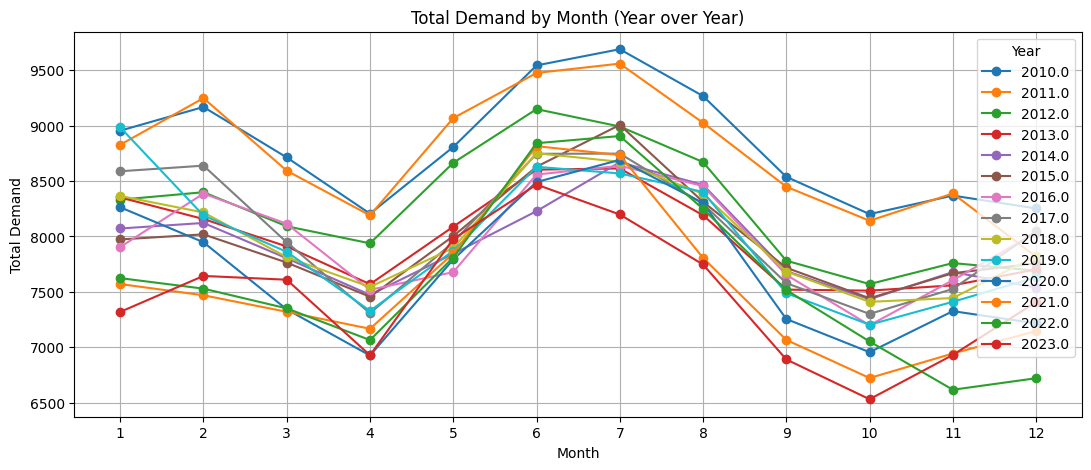

In [ ]:
# Plot the line chart
pivot_df.plot(kind='line', marker='o', figsize=(13, 5))
plt.title('Total Demand by Month (Year over Year)')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year', loc='best')
plt.show()

3. Time Series Analysis

Results of Dickey-Fuller Test:
Test Statistic                  -1.993421
p-value                          0.289465
#Lags Used                      12.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64




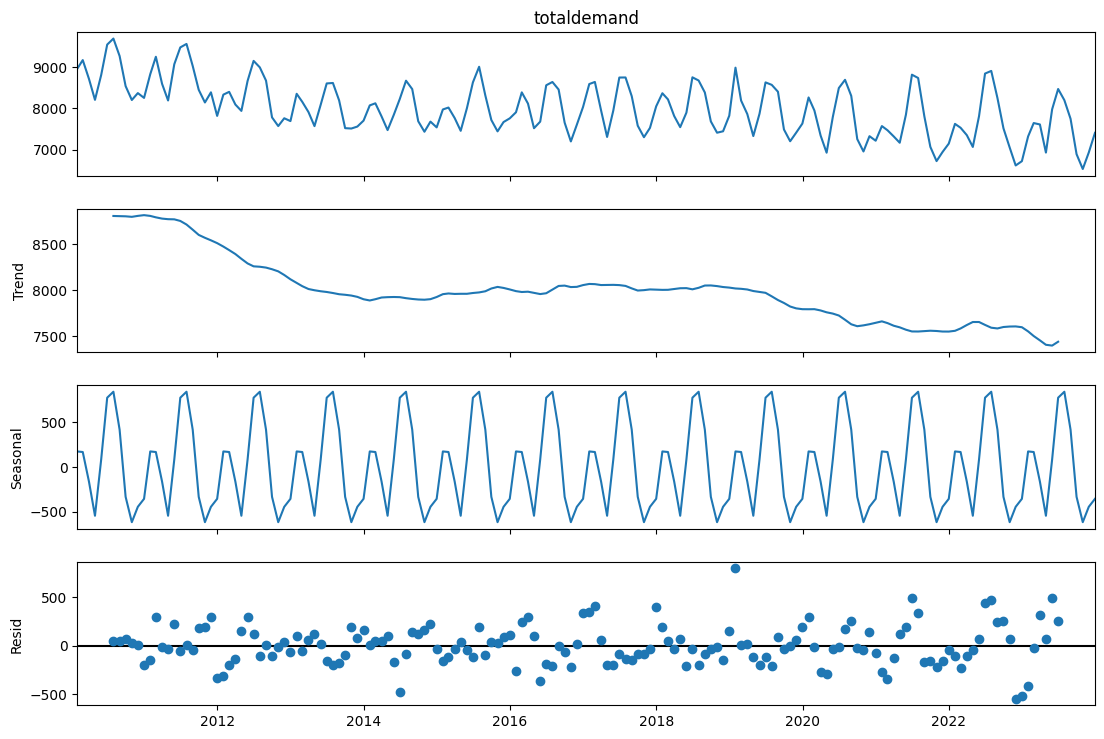

In [ ]:
# Check if time series data is stationary
def df_test(time_series):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print (dfoutput)

# Apply the function to the dataset
df_test(df_demand_nsw_mth.totaldemand)

print('\n')
# Check the time series trend, seasonality and residuals (noise component) and analyze.
decomp = seasonal_decompose(df_demand_nsw_mth.totaldemand)
fig = decomp.plot()
fig.set_size_inches(12,8)

## Forecasting Models

1. Holt Winter Model
2. SARIMAX Model
3. Prophet Model

In [ ]:
## data processing for model
forecast_mths = 12 ## set the forecast next 12 months
df_demand_nsw_mth['ds'] = df_demand_nsw_mth.index

train = df_demand_nsw_mth[ : -forecast_mths]
test = df_demand_nsw_mth[-forecast_mths :]

y_train = train['totaldemand']
y_test = test['totaldemand']

print('Train size: ' + str(train.shape[0]) +   ' , Test size: ' + str(test.shape[0]))

Train size: 156 , Test size: 12


In [ ]:
## forecast the monthly usage
## 1. Holt Winter Forecast
hw_model = ExponentialSmoothing(y_train, seasonal_periods = 12, trend ='mul', seasonal = 'mul')
hw_fit = hw_model.fit()
hw_pred = hw_fit.forecast(len(y_test))

In [ ]:
## 2. ARIMAX Forecast
## Find the best arimax
sarimax_model = auto_arima(y_train, start_p = 0, start_q = 0
                                ,max_p = 3, max_q = 3
                                , m = 12 #12 is the frequncy of the cycle
                                , test = 'adf', seasonal = True #set to seasonal
                                , d=1, D=1, trace = True, error_action = 'ignore'
                                , suppress_warnings = True, stepwise = True)

model_order = sarimax_model.get_params()['order']
model_seasonal_order = sarimax_model.get_params()['seasonal_order']

sr_model = SARIMAX(y_train, order = model_order, seasonal_order = model_seasonal_order)
sr_model_fit = sr_model.fit()
print(sr_model_fit.summary())

sr_pred = sr_model_fit.forecast(len(y_test))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1993.226, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1973.439, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1961.622, Time=0.45 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1980.744, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1959.253, Time=1.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=4.72 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1963.129, Time=1.23 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1943.168, Time=2.42 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1946.625, Time=0.84 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=3.57 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1961.614, Time=1.24 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=1

In [ ]:
# 3. Phophet Model
# data processing for model
p_train = train[['ds', 'totaldemand']]
p_train.columns = ['ds','y']

## Prophet model
pp_model = Prophet()
pp_model.fit(p_train)
pp_pred = pp_model.make_future_dataframe(periods=len(y_test), freq='M')
pp_pred = pp_model.predict(pp_pred)
pp_pred.index = pp_pred.ds
pp_pred = pp_pred.iloc[-len(y_test):, ]['yhat'].values

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4f31wr_x/66plt0t2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4f31wr_x/k6vwyk67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75238', 'data', 'file=/tmp/tmp4f31wr_x/66plt0t2.json', 'init=/tmp/tmp4f31wr_x/k6vwyk67.json', 'output', 'file=/tmp/tmp4f31wr_x/prophet_modell42vmlau/prophet_model-20240410132102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
## 4.Calculate Mean Absolute Percentage Error and Root Mean Square Error
def accuracy(y_test, y_pred):
    mape = np.mean(np.abs(( y_test - y_pred) / y_test)*100)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2 ))
    return(mape, rmse)

In [ ]:
## 5.Review the result from model
models = {
    'Holt Winter': hw_pred
    ,'ARIMAX': sr_pred
    ,'Prophet': pp_pred
}

Holt Winter
Mean Absolute Percentage Error (MAPE) : 5.93%
Root Mean Square Error : 512.4903826341109
ARIMAX
Mean Absolute Percentage Error (MAPE) : 3.56%
Root Mean Square Error : 301.5112631155481
Prophet
Mean Absolute Percentage Error (MAPE) : 2.98%
Root Mean Square Error : 281.4485990514102




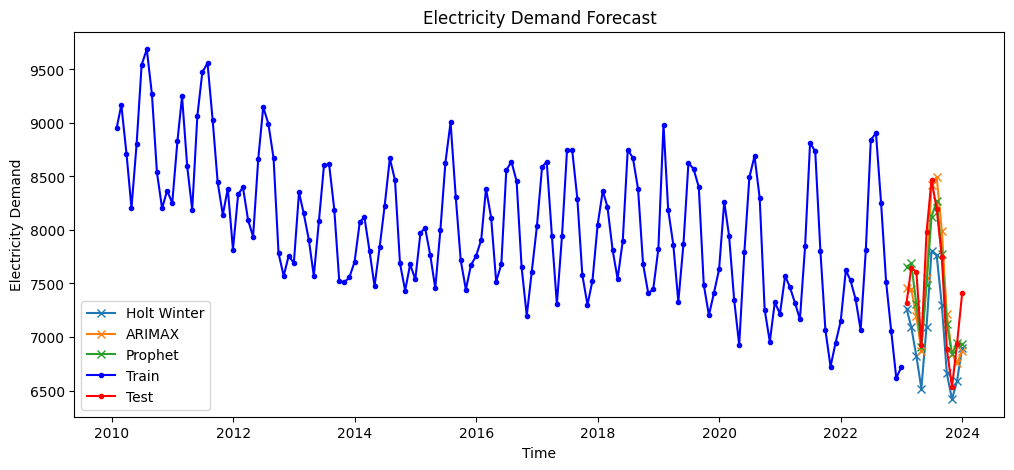

In [ ]:
plt.figure(figsize=(12,5))
for name, y_pred in models.items():
    mape, rmse = accuracy(y_test, y_pred)
    print('================================================================')
    print(name)
    print('Mean Absolute Percentage Error (MAPE) : {:.2f}%'.format(mape))
    print('Root Mean Square Error : {}'.format(rmse))

    # Plot forecast
    plt.plot(test.index, y_pred, 'x-', label=name)  # Predictions

print('\n')
plt.plot(train.index, y_train, 'b.-', label='Train')  # Train data
plt.plot(test.index, y_test, 'r.-', label='Test')  # Test data
plt.xlabel('Time', fontsize=10)
plt.ylabel('Electricity Demand', fontsize=10)
plt.legend(loc='best')
plt.title('Electricity Demand Forecast', fontsize=12)
plt.show()

Model Evaluation:
* **Holt-Winter's Exponential Smoothing** yielded a MAPE of 5.93% and an RMSE of 512.49. This indicates that, on average, the model's predictions were off by 5.93% from the actual values, with a square root of the average squared differences between predicted and actual values being approximately 512.49.
* **SARIMAX**, configured as (1, 1, 1)x(0, 1, [1, 2], 12), showed a MAPE of 3.56% and an RMSE of 301.51, demonstrating better accuracy in forecasting compared to the Holt-Winter model.
* **Prophet** achieved the best performance among the three, with a MAPE of 2.98% and an RMSE of 281.45. This suggests that Prophet's forecasts were closest to the actual observations, making it the most accurate model in this context.


**Results:**

The Dickey-Fuller test indicated that the original time series was not stationary, with a p-value of 0.289465, suggesting the presence of a unit root. This non-stationarity was addressed through the modeling process, especially with SARIMAX and Prophet, which inherently handle seasonality and trend.

The electricity demand data exhibited clear seasonal patterns, as illustrated by the yearly seasonal decomposition plot. This seasonality, along with any trends or cyclic behavior in the data, was effectively captured by the models, particularly by the Prophet model, as reflected in its superior performance metrics.


**Conclusion:**

The forecasting exercise demonstrated the capability of advanced time series models to accurately predict electricity demand based on historical data. Among the models tested, Prophet emerged as the most effective, balancing simplicity with forecasting accuracy. This suggests that for similar time series forecasting tasks, especially those with clear seasonality and trends, Prophet can be a strong candidate due to its robustness and ease of use.

The SARIMAX model also performed commendably, offering a good balance between model complexity and predictive accuracy. In contrast, while the Holt-Winter model was the simplest to implement, it lagged behind the other models in terms of predictive performance.

,ds,yhat,yhat_lower,yhat_upper
271,2032-08-31,6823.301623,6116.579223,7558.311756
272,2032-09-30,5952.857904,5222.705283,6729.152312
273,2032-10-31,5652.331390,4892.651673,6409.899303
274,2032-11-30,5878.863400,5130.803968,6641.601447
275,2032-12-31,6061.880389,5308.997718,6887.385351


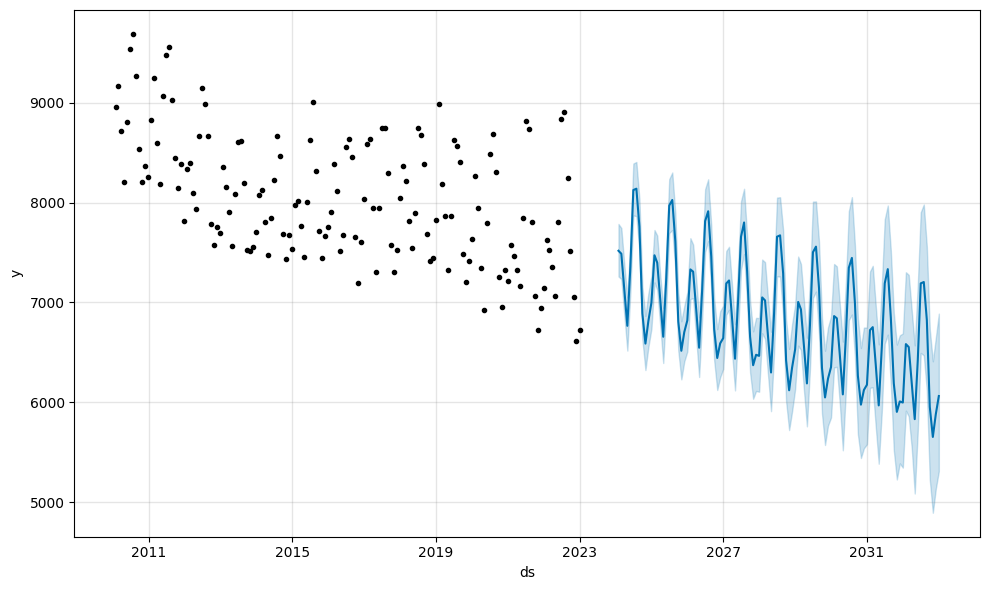

In [ ]:
# Extend the forecast range to the next 10 years (120 months)
future_dates = pp_model.make_future_dataframe(periods=120, freq='M')

# Predict the future with the fitted model
forecast = pp_model.predict(future_dates)

# Filter out the forecast from 2024 to 2033
forecast_filtered = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2033-12-31')]

# Plot the forecast
fig = pp_model.plot(forecast_filtered)

# Display the forecast data
forecast_filtered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


The yhat column represents the predicted demand, while yhat_lower and yhat_upper provide a confidence interval for these predictions. The plot visualizes the forecasted demand, showcasing the model's expectations for future electricity demand trends and seasonal patterns.

# Time Series Analysis

In [ ]:
df_totaldemand_nsw_ar = df_totaldemand_nsw.copy()
df_totaldemand_nsw_ar

#convert from object to datetime
# df_totaldemand_nsw_ar["DATETIME"] = pd.to_datetime(df_totaldemand_nsw_ar["DATETIME"], dayfirst=True)

# df_totaldemand_nsw_ar["Date"] = df_totaldemand_nsw_ar["DATETIME"].dt.date
df_totaldemand_nsw_ar.head(5)

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.00
1,2010-01-01 00:30:00,7809.31
2,2010-01-01 01:00:00,7483.69
3,2010-01-01 01:30:00,7117.23
4,2010-01-01 02:00:00,6812.03


In [ ]:
# df_totaldemand_nsw_ar.info()
df_totaldemand_nsw_ar

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.000000
1,2010-01-01 00:30:00,7809.310000
2,2010-01-01 01:00:00,7483.690000
3,2010-01-01 01:30:00,7117.230000
4,2010-01-01 02:00:00,6812.030000
...,...,...
245419,2023-12-31 21:30:00,6971.670000
245420,2023-12-31 22:00:00,6877.370000
245421,2023-12-31 22:30:00,6795.615000
245422,2023-12-31 23:00:00,6671.048333


In [ ]:
df_totaldemand_nsw_ar['DATETIME'] = pd.to_datetime(df_totaldemand_nsw_ar['DATETIME'])
df_totaldemand_nsw_ar['DATE'] = df_totaldemand_nsw_ar['DATETIME'].dt.date
average_daily_demand = df_totaldemand_nsw_ar.groupby('DATE')['TOTALDEMAND'].mean().reset_index()
average_daily_demand.columns = ['DATE', 'AVERAGE_DEMAND']
print(average_daily_demand)


            DATE  AVERAGE_DEMAND
0     2010-01-01     7801.352917
1     2010-01-02     8017.459792
2     2010-01-03     7399.899583
3     2010-01-04     8241.720208
4     2010-01-05     8827.813125
...          ...             ...
5108  2023-12-27     6617.035868
5109  2023-12-28     6718.993507
5110  2023-12-29     7008.289583
5111  2023-12-30     6086.036076
5112  2023-12-31     6392.489965

[5113 rows x 2 columns]


In [ ]:
df_totaldemand_nsw_ar.index = pd.to_datetime(df_totaldemand_nsw_ar.index)

In [ ]:
avg_daily_demand = df_totaldemand_nsw_ar['TOTALDEMAND'].resample('D').mean()
avg_daily_demand

1970-01-01    8000.202586
Freq: D, Name: TOTALDEMAND, dtype: float64

In [ ]:
X=average_daily_demand
print('Shape of data \t', average_daily_demand.shape)
print('Original Dataset: \n',average_daily_demand.head())
print('After Extracting only demand:\n',X)

Shape of data 	 (5113, 2)
Original Dataset: 
          DATE  AVERAGE_DEMAND
0  2010-01-01     7801.352917
1  2010-01-02     8017.459792
2  2010-01-03     7399.899583
3  2010-01-04     8241.720208
4  2010-01-05     8827.813125
After Extracting only demand:
             DATE  AVERAGE_DEMAND
0     2010-01-01     7801.352917
1     2010-01-02     8017.459792
2     2010-01-03     7399.899583
3     2010-01-04     8241.720208
4     2010-01-05     8827.813125
...          ...             ...
5108  2023-12-27     6617.035868
5109  2023-12-28     6718.993507
5110  2023-12-29     7008.289583
5111  2023-12-30     6086.036076
5112  2023-12-31     6392.489965

[5113 rows x 2 columns]


<Axes: >

<Figure size 1500x600 with 0 Axes>

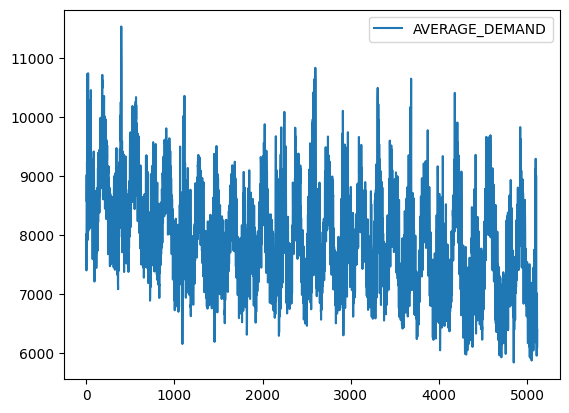

In [ ]:
# avg_daily_demand = avg_daily_demand.drop('DATETIME', axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
average_daily_demand.plot()

Check for stationarity. Visually the timeseries does NOT looks stationary. It has a strong seasonality pattern and downward trend.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(average_daily_demand)
result.plot()

TypeError: float() argument must be a string or a real number, not 'datetime.date'

The decomposition of the Demand data shows an downward trend and a strong seasonality.

In [ ]:
# Check if time series data is stationary
def df_test(time_series):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print (dfoutput)

# Apply the function to the dataset
df_test(avg_daily_demand.values)

Results of Dickey-Fuller Test:


ValueError: Invalid input, x is constant

The result of the Dickey fuller test gives a p-value of 4.26e-07 which is < 0.05. It means the data is stationary.


# Cleaning TimeSeries Data for stationarity

In [ ]:
#import pandas as pd
#from sklearn import preprocessing

#x = avg_daily_demand.TOTALDEMAND #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x.values.reshape(-1, 1))
#stationary_x = pd.DataFrame(x_scaled)
#stationary_x.head()

In [ ]:
avg_daily_demand

1970-01-01    8000.202586
Freq: D, Name: TOTALDEMAND, dtype: float64

In [ ]:
print(avg_daily_demand.head())

1970-01-01    8000.202586
Freq: D, Name: TOTALDEMAND, dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Assuming avg_daily_demand is a pandas Series
df_stationary = np.sqrt(avg_daily_demand)
df_diff = df_stationary.diff().dropna()

# Display the first few rows of the differenced series
print(df_diff.head())


Series([], Freq: D, Name: TOTALDEMAND, dtype: float64)


In [ ]:
#Transforming the data
# import numpy as np
# df_stationary=np.sqrt(avg_daily_demand['TOTALDEMAND'])
# df_diff=df_stationary.diff().dropna()
# df_diff.head()

ValueError: zero-size array to reduction operation fmin which has no identity

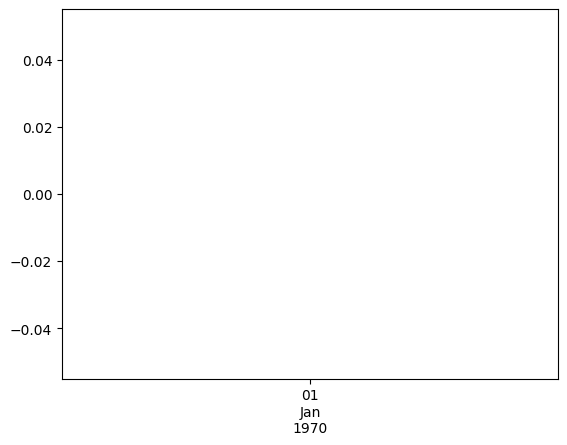

In [ ]:
df_diff.plot()

In [ ]:
prev_demand_value = avg_daily_demand.TOTALDEMAND.shift()
differenced_demand = avg_daily_demand.TOTALDEMAND - prev_demand_value
differenced_demand.plot()

AttributeError: 'Series' object has no attribute 'TOTALDEMAND'

In [ ]:
# Check if time series data is stationary
def df_test(time_series):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print (dfoutput)

# Apply the function to the dataset
df_test(df_diff)

# Auto Regression - Test

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import numpy as np
import pandas as pd

# Split the data
train_end = '2020-12-31'
test_end = '2022-12-31'

train = df_diff[:train_end]
test = df_diff[train_end:test_end]
validation = df_diff[test_end:]

# Initial model evaluation to choose 'lags'
lags = 30  # Example value, adjust based on model performance
model_eval = AutoReg(train, lags=lags).fit()
print(model_eval.summary())

# Prediction on test set for model evaluation
pred_test = model_eval.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test, pred_test))
print(f'Test RMSE: {rmse_test}')

# Plotting predictions vs actual for the test set
pyplot.figure(figsize=(10, 6))
pyplot.plot(test.index, pred_test, color='green', label='Predicted')
pyplot.plot(test.index, test, color='red', label='Actual')
pyplot.legend()
pyplot.show()

# Retrain the model with chosen lags on train + test set for final evaluation on validation set
train_test = pd.concat([train, test])
model_final = AutoReg(train_test, lags=lags).fit()

# Prediction on validation set
pred_validation = model_final.predict(start=len(train_test), end=len(train_test)+len(validation)-1, dynamic=False)

# Calculate RMSE for the validation set
rmse_validation = np.sqrt(mean_squared_error(validation, pred_validation))
print(f'Validation RMSE: {rmse_validation}')

# De-normalization for test predictions to get actual forecast values
# Assuming avg_daily_demand is available as per your description
# Cumulatively sum the predicted differences and add them to the last known actual value before predictions
last_actual_value_train = df_diff[:train_end].iloc[-1]  # Last known value in the training set
cumulative_sum_test = pred_test.cumsum()  # Cumulative sum of predicted differences
de_normalized_forecast_test = last_actual_value_train + cumulative_sum_test

# Plot de-normalized predictions vs actual values for the test period
pyplot.figure(figsize=(10, 6))
pyplot.plot(test.index, de_normalized_forecast_test, color='green', label='De-normalized Predicted')
pyplot.plot(df_diff[train_end:test_end].index, df_diff[train_end:test_end], color='red', label='Actual')
pyplot.legend()
pyplot.show()

# De-normalization for validation predictions (similar approach as for test predictions)
last_actual_value_test = df_diff[train_end:test_end].iloc[-1]  # Last known value before validation predictions
cumulative_sum_validation = pred_validation.cumsum()  # Cumulative sum of predicted differences
de_normalized_forecast_validation = last_actual_value_test + cumulative_sum_validation

# Printing first few de-normalized forecast values for validation
print(f'De-normalized forecast values for validation:')
print(de_normalized_forecast_validation.head())

# Future prediction for the next decade from the last date in avg_daily_demand
pred_future_diff = model_final.predict(start=len(train_test) + len(validation),
                                        end=len(train_test) + len(validation) + 3650 - 1,
                                        dynamic=False)

# Assuming avg_daily_demand is a Series with a datetime index
last_known_value = df_diff.iloc[-1]

# To de-normalize, cumulatively sum the future differenced predictions and add to the last known actual value
cumulative_future_diff = pred_future_diff.cumsum()
de_normalized_future_forecast = last_known_value + cumulative_future_diff

print("The future prediction for the next decade:")
print(de_normalized_future_forecast.head())  # Print the first few to keep the output manageable
print('Number of Predictions Made:', len(de_normalized_future_forecast))



ValueError: maxlag should be < nobs

# Auto Regression

In Auto Regression, we use past values to make a future prediction. But how many past values should we use to forecast future values? The Auto correlation and Partial Auto correlation plots will help us with this decision.

In [ ]:
# differenced_demand=differenced_demand.dropna()
# print(differenced_demand)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(avg_daily_demand,lags=50)
acf=plot_acf(avg_daily_demand,lags=50)

The Correlation plots give us the number of lags on the x-axis and pearson correlation coefficient on the y-axis. The higher the value, the higher the correlation. For the purpose of Auto Regression, we only look at the Partial AutoCorrelation function which looks at the direct effects of the previous time lag and the current time lag.

From our Partial Autocorrelation Plot, Let's pick the first 30 lags as they seem to be highly correlated i.e. >0.25 and then observe the p-value from the results.

Splitting our data into training and test sets to apply AutoRegression.

In [ ]:
#Using 2010 to 2022 as training set, 2023 for testing
train=avg_daily_demand[:len(avg_daily_demand)-365]
test=avg_daily_demand[len(avg_daily_demand)-365:]


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train.astype(float),lags=30).fit()

In [ ]:
print(ar_model.summary())

From the summary, we observe the p-value of each lag. Up until lag=18, the p-value is less than 0.05, meaning it is contributing significantly to our future predicition. So I will fit the model again with 18 lags instead of 30.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train,lags=15).fit()
print(ar_model.summary())

Make prediction on Test set and compare.

In [ ]:
pred=ar_model.predict(start=len(train),end=len(avg_daily_demand)-1, dynamic=False)

In [ ]:
from matplotlib import pyplot
pyplot.plot(pred,color='green')
pyplot.plot(test,color='red')
print(pred)

Calculate the error in prediction

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

Making Future Predictions

In [ ]:
pred_future=ar_model.predict(start=len(avg_daily_demand)+1,end=len(avg_daily_demand)+3650,dynamic=False)
print("The future prediction for the next decade")
print(pred_future)
print('Number of Predictions Made: \t',len(pred_future))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Assuming `test` is your actual values and `pred` are your predicted values

# R-squared (Coefficient of Determination)
r2 = r2_score(test, pred)
print("R-squared (R²):", r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test, pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Absolute Percentage Error (MAPE)
# Avoid division by zero and handle it according to your requirements
mape = np.mean(np.abs((test - pred) / test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


In [ ]:
start_date = avg_daily_demand.index[-1] + pd.Timedelta(days=1)
dates = pd.date_range(start=start_date, periods=len(pred_future), freq='D')
pred_series = pd.Series(pred_future, index=dates)

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(15, 6))

# Plot the average daily demand
avg_daily_demand.plot(label='Average Daily Demand', color='tab:green')

# Plot the predicted future values
pred_series.plot(label='Predicted Future Demand', color='tab:blue')

# Adding title and labels
plt.title('Average Daily Demand and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Demand')

# Adding a legend to distinguish between the datasets
plt.legend()

# Optionally, you can add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
df_non_stationary = pred_future.cumsum() + pred_future.iloc[0]
df_non_stationary


# Exploratory Data Analysis - Updated

Data visualization of the Energy demand over the time

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from datetime import datetime

In [ ]:
df_totaldemand_nsw.head()

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.00
1,2010-01-01 00:30:00,7809.31
2,2010-01-01 01:00:00,7483.69
3,2010-01-01 01:30:00,7117.23
4,2010-01-01 02:00:00,6812.03


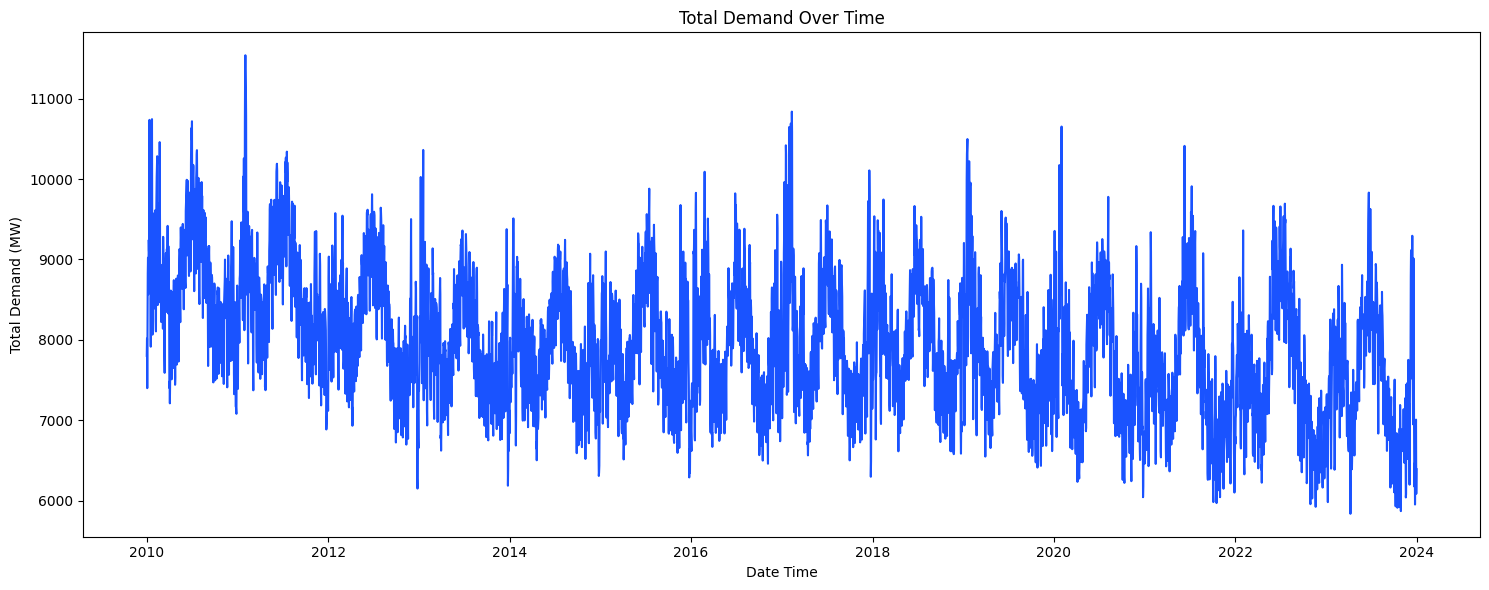

In [ ]:
#run a. Consolidate data source beforehand
plt.figure(figsize=(15, 6))

# Without resampling
# plt.plot(df_totaldemand_nsw['DATETIME'], df_totaldemand_nsw['TOTALDEMAND'], marker='o', linestyle='-', markersize=4, color='#ffa300', markerfacecolor='#e60049')

# Resample the data for daily mean values
df_daily_totaldemand_nsw = df_totaldemand_nsw.resample('D', on='DATETIME').mean()
plt.plot(df_daily_totaldemand_nsw.index, df_daily_totaldemand_nsw['TOTALDEMAND'], linestyle='-', color='#1a53ff')


plt.title('Total Demand Over Time')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()


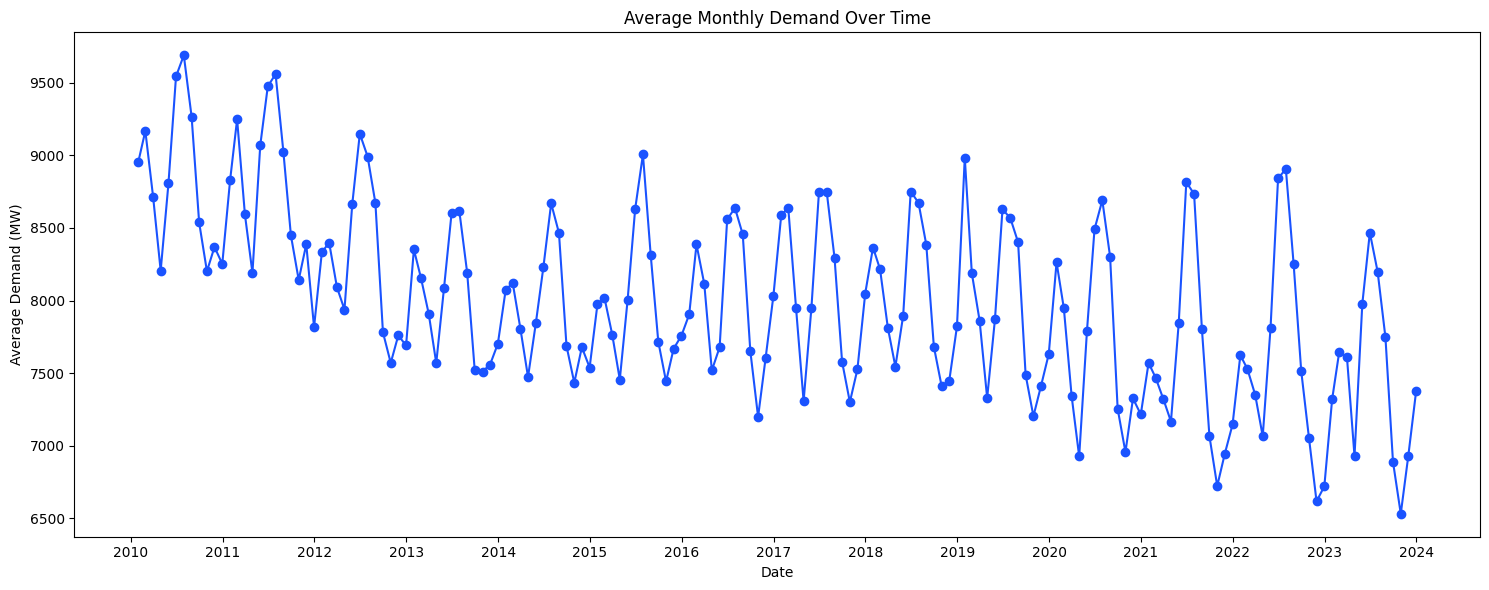

In [ ]:
# Resample the data for monthly mean values
df_monthly_totaldemand_nsw = df_totaldemand_nsw.resample('M', on='DATETIME').mean(numeric_only=True)

plt.figure(figsize=(15, 6))
plt.plot(df_monthly_totaldemand_nsw.index, df_monthly_totaldemand_nsw['TOTALDEMAND'], linestyle='-', marker='o', color='#1a53ff')

plt.title('Average Monthly Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Average Demand (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()


## For 2022 Only

In [ ]:
# Filter for the year 2022
df_2022 = df_totaldemand_nsw[df_totaldemand_nsw['DATETIME'].dt.year == 2022]

In [ ]:
# Sort the DataFrame just in case
df_2022_sorted = df_2022.sort_values('DATETIME', ascending=True)

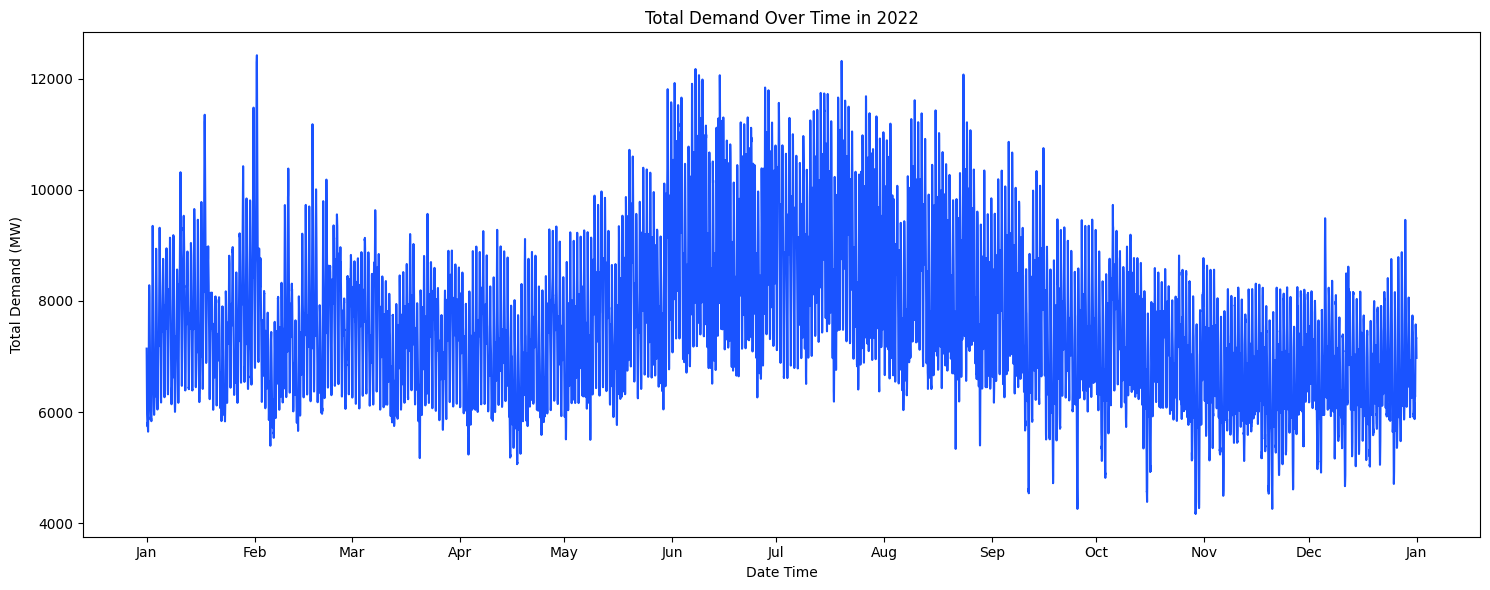

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2022_sorted, x='DATETIME', y='TOTALDEMAND', color='#1a53ff')

plt.title('Total Demand Over Time in 2022')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()


## Divide year 2022 in 4 quarter

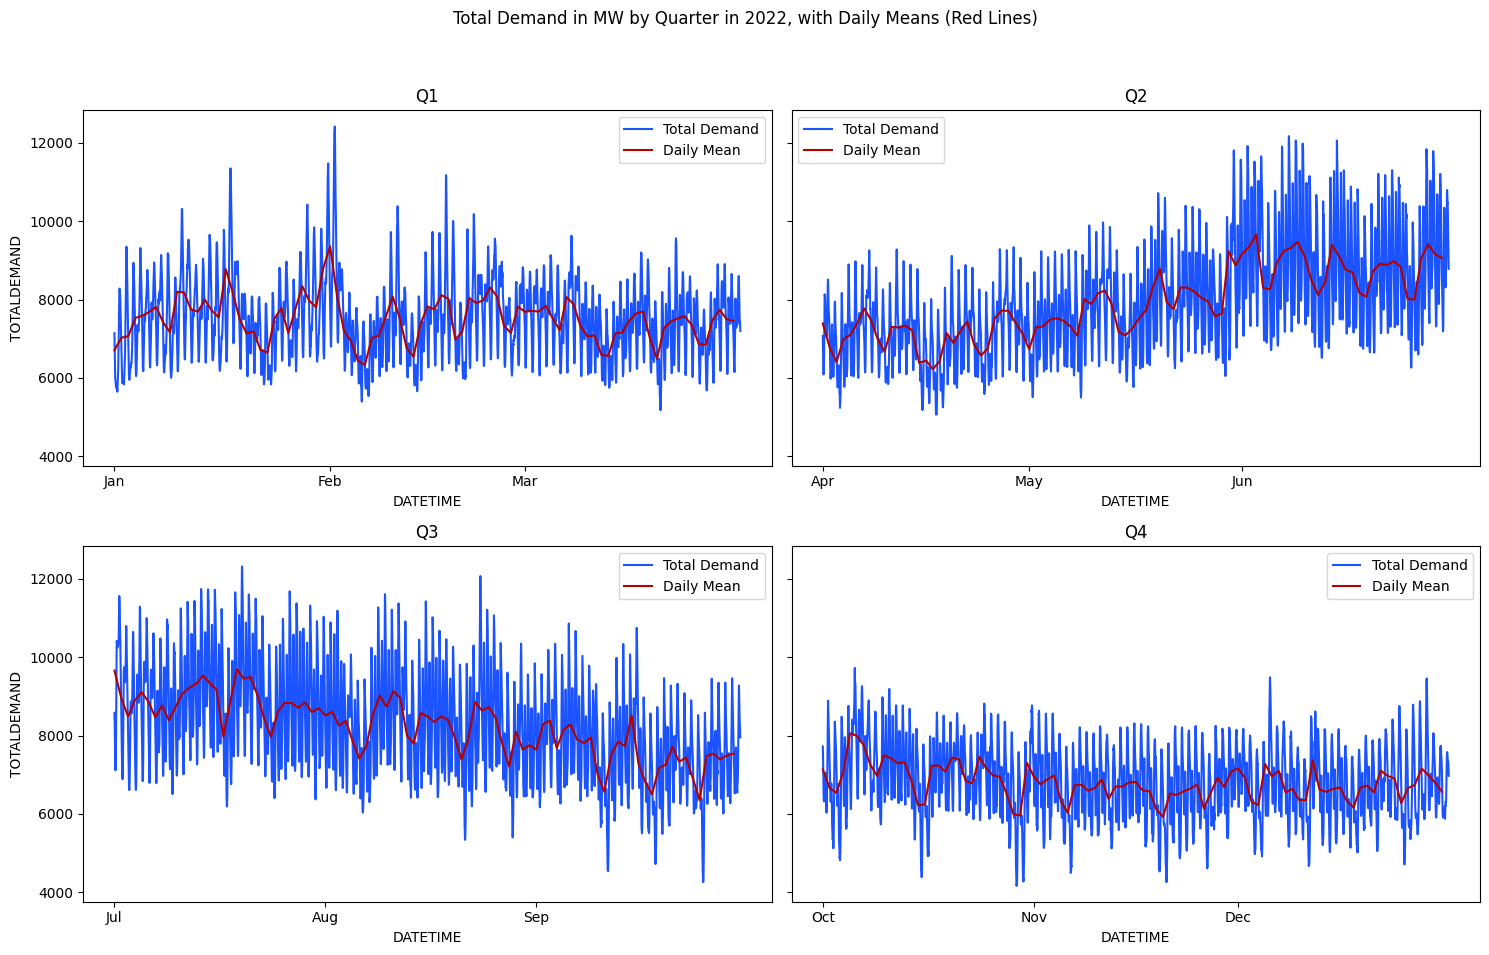

In [ ]:
df_daily_mean = df_2022.resample('D', on='DATETIME').mean().reset_index()

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Total Demand in MW by Quarter in 2022, with Daily Means (Red Lines)')

# Flatten axes for easy iteration
axes = axes.flatten()

# Quarter start months for labeling purposes
quarter_months = {
    1: ['Jan', 'Feb', 'Mar'],
    2: ['Apr', 'May', 'Jun'],
    3: ['Jul', 'Aug', 'Sep'],
    4: ['Oct', 'Nov', 'Dec']
}

# Loop through each quarter
for quarter in range(1, 5):
    # Filter the DataFrame for the quarter
    start_month = (quarter - 1) * 3 + 1
    end_month = start_month + 2
    df_quarter = df_2022[(df_2022['DATETIME'].dt.month >= start_month) & (df_2022['DATETIME'].dt.month <= end_month)]
    df_quarter_mean = df_daily_mean[(df_daily_mean['DATETIME'].dt.month >= start_month) & (df_daily_mean['DATETIME'].dt.month <= end_month)]

    # Plot total demand
    ax = axes[quarter-1]
    sns.lineplot(data=df_quarter, x='DATETIME', y='TOTALDEMAND', ax=ax, label='Total Demand', color='#1a53ff', linestyle='-')

    # Plot daily mean demand
    sns.lineplot(data=df_quarter_mean, x='DATETIME', y='TOTALDEMAND', ax=ax, label='Daily Mean', color='#b30000', linestyle='-')

    ax.set_title(f"Q{quarter}")
    ax.set_xticks([pd.to_datetime(f"2022-{month:02d}-01") for month in range(start_month, end_month + 1)])
    ax.set_xticklabels(quarter_months[quarter])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Visualizing daily mean demand
Let's visualize the daily mean demand over the week.

In [ ]:
# Convert DATETIME to datetime format,
# create a weekday name column, calculate daily mean demand, and prepare data for plotting by resetting the index.

df_totaldemand_nsw['DATETIME'] = pd.to_datetime(df_totaldemand_nsw['DATETIME'])
df_totaldemand_nsw['DayOfWeekName'] = df_totaldemand_nsw['DATETIME'].dt.day_name()
mean_demand_by_day = df_totaldemand_nsw.groupby('DayOfWeekName')['TOTALDEMAND'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_mean_demand_by_day = mean_demand_by_day.reset_index()

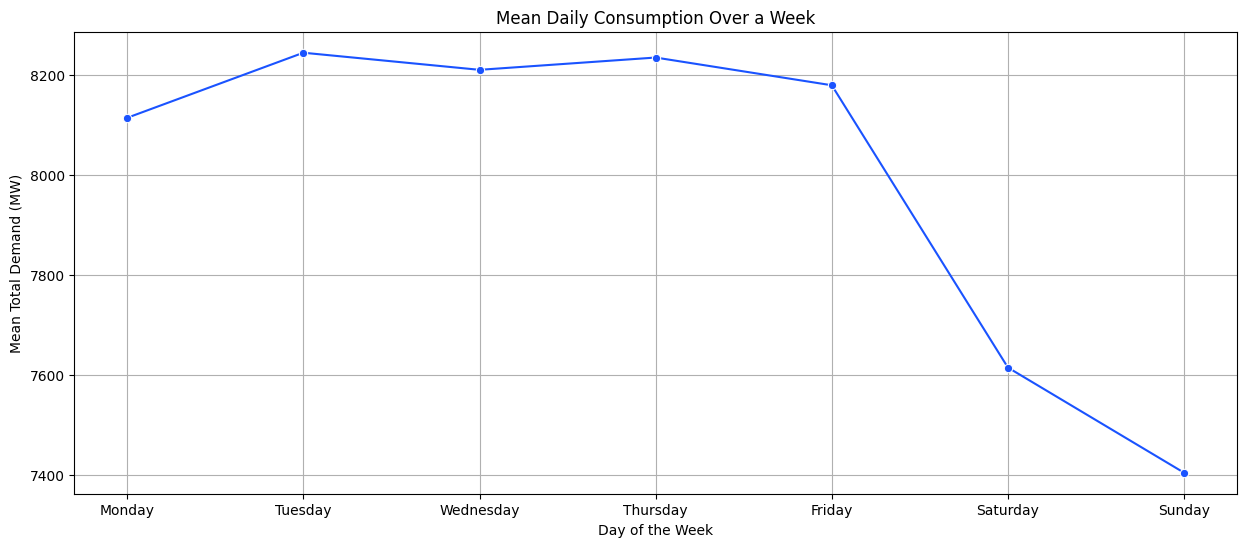

In [ ]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=df_mean_demand_by_day, x='DayOfWeekName', y='TOTALDEMAND', marker='o', linestyle='-', color='#1a53ff')

plt.title('Mean Daily Consumption Over a Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Total Demand (MW)')

plt.grid(True)
plt.show()

In [ ]:
# Set start date and create list for first four weeks of January 2022
start_date = pd.to_datetime('2022-01-01')
weeks = [start_date + pd.Timedelta(days=7*i) for i in range(4)]


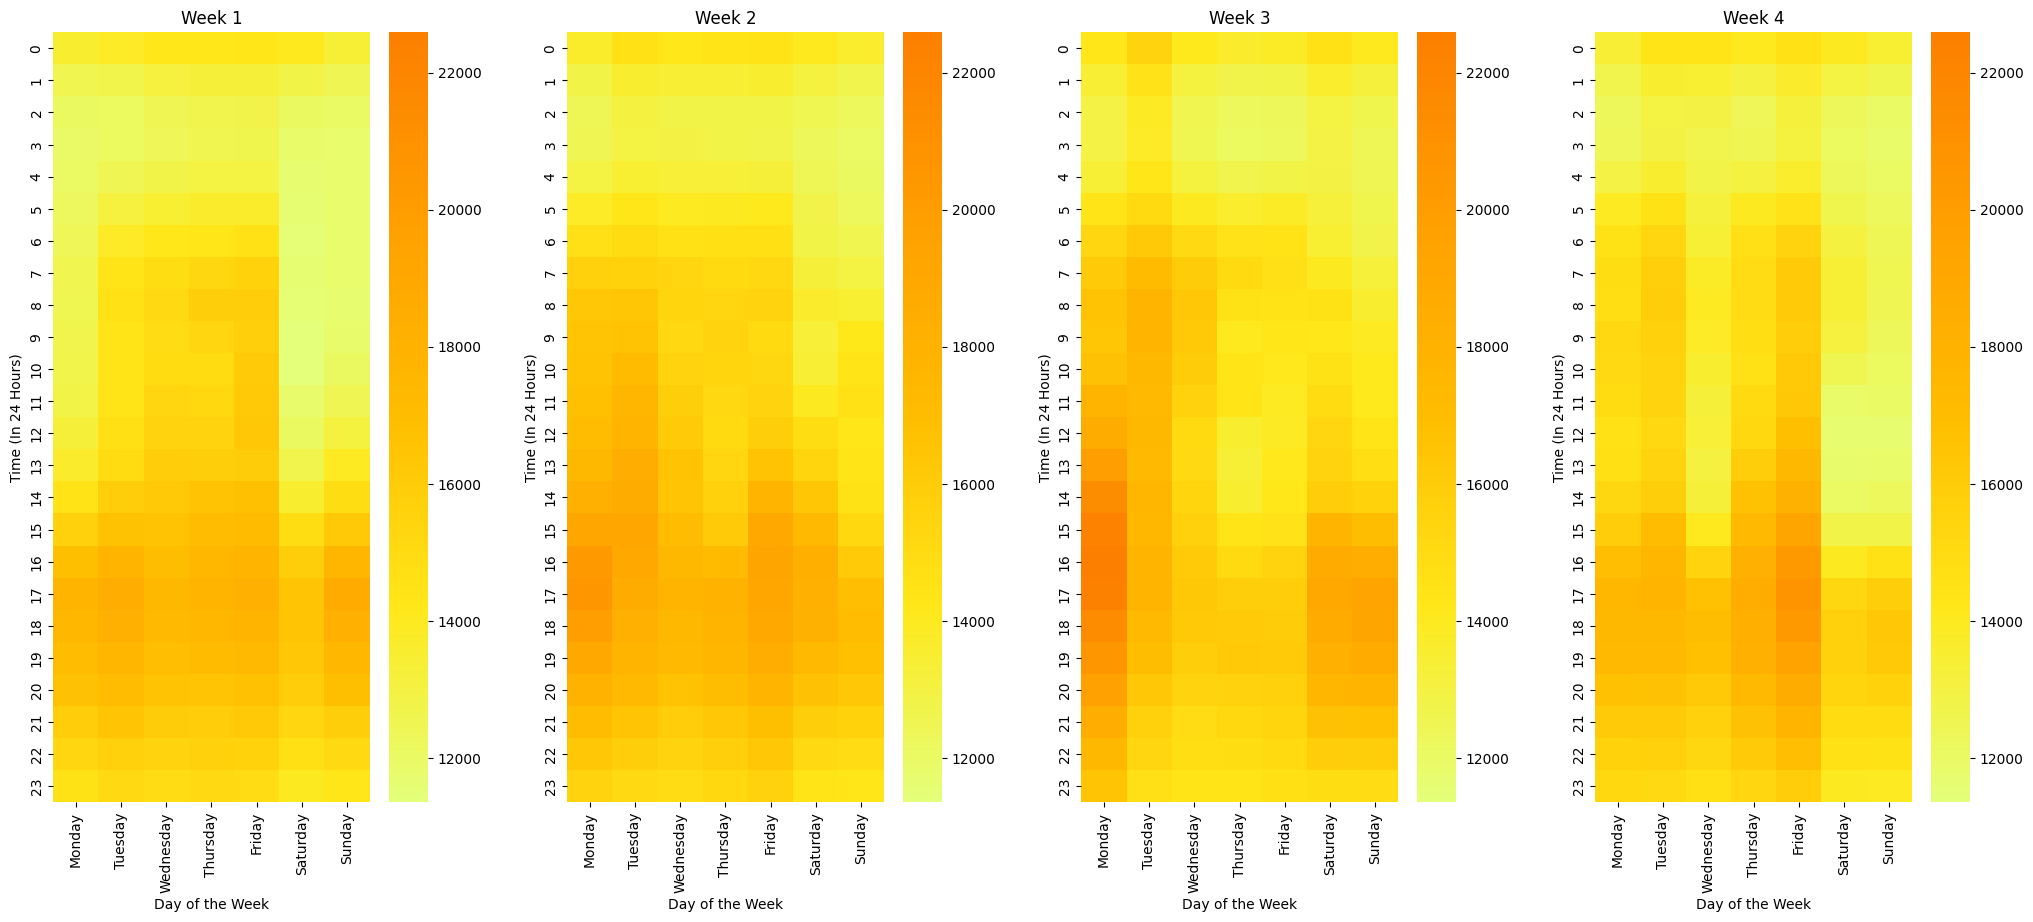

In [ ]:
def heatGen(data):
    dic = {hour: {day: 0 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']} for hour in range(24)}

    for _, row in data.iterrows():
        hour = row['DATETIME'].hour
        weekday = row['DATETIME'].strftime('%A')
        dic[hour][weekday] += row['TOTALDEMAND']

    return pd.DataFrame(dic).T

# Generate heatmaps data for each week
heat_dfs = []
for week_start in weeks:
    week_end = week_start + pd.Timedelta(days=7)
    df_week = df_totaldemand_nsw[(df_totaldemand_nsw['DATETIME'] >= week_start) & (df_totaldemand_nsw['DATETIME'] < week_end)]
    heat_dfs.append(heatGen(df_week))

fig = plt.figure(figsize=(25, 10), facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 4, figure=fig, hspace=0.5, wspace=0.3)

scalemin = 50000
scalemax = 0
for i, df_heat in enumerate(heat_dfs):
    if df_heat.max().max() > scalemax: scalemax = df_heat.max().max()
    if df_heat.min().min() < scalemin: scalemin = df_heat.min().min()

for i, df_heat in enumerate(heat_dfs):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(df_heat, annot=False, cmap="Wistia", ax=ax, vmin=scalemin, vmax=scalemax)

    ax.set_title(f"Week {i+1}")
    ax.set_xlabel("Day of the Week")
    ax.set_ylabel("Time (In 24 Hours)")
    ax.set_xticklabels(df_heat.columns, rotation=90)
    ax.set_yticklabels(df_heat.index)

plt.show()


## Temperature Linear Model


In [ ]:
df_temperature_nsw

,year,month,day,TEMPERATURE,date
0,2010,1,1,28.8,2010-01-01
1,2010,1,2,29.4,2010-01-02
2,2010,1,3,21.5,2010-01-03
3,2010,1,4,23.9,2010-01-04
4,2010,1,5,27.7,2010-01-05
...,...,...,...,...,...
20449,2023,12,27,27.1,2023-12-27
20450,2023,12,28,31.2,2023-12-28
20451,2023,12,29,26.7,2023-12-29
20452,2023,12,30,27.9,2023-12-30


Plotting mean annual temperature

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Plot of mean temperature by year
mean_temp_by_year = df_temperature_nsw.groupby('year')['TEMPERATURE'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(mean_temp_by_year.index, mean_temp_by_year.values, marker='o', linestyle='-', color='#1a53ff')

plt.title('Mean Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')

plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
mean_temp_by_year

year
2010    22.420548
2011    22.178904
2012    22.123497
2013    23.195890
2014    22.869315
2015    22.256712
2016    23.474931
2017    23.352603
2018    23.177808
2019    23.613973
2020    22.768852
2021    22.964932
2022    22.744110
2023    24.604110
Name: TEMPERATURE, dtype: float64

In [ ]:
annual_temp_nsw = mean_temp_by_year.to_frame().reset_index()
annual_temp_nsw.columns = ['year', 'temperature']
annual_temp_nsw

,year,temperature
0,2010,22.420548
1,2011,22.178904
2,2012,22.123497
3,2013,23.195890
4,2014,22.869315
5,2015,22.256712
6,2016,23.474931
7,2017,23.352603
8,2018,23.177808
9,2019,23.613973


Perform a linear regression



In [ ]:
X = annual_temp_nsw[['year']]
y = annual_temp_nsw['temperature']

model = LinearRegression()
model.fit(X, y)

# future_years = np.arange(2024, 2034).reshape(-1, 1)
future_years = pd.DataFrame(np.arange(2024, 2034), columns=['year'])
future_temperatures = model.predict(future_years)

# 1 degree warmer by 2033
rate_of_change = 1
years_difference = 2033 - future_years.iloc[0][0]
future_temperatures_adjusted = future_temperatures + (rate_of_change / years_difference)

future_predictions = pd.Series(future_temperatures_adjusted.flatten(), index=future_years['year'], name='temperature')
print(future_predictions)

year
2024    23.843830
2025    23.943943
2026    24.044056
2027    24.144169
2028    24.244282
2029    24.344395
2030    24.444508
2031    24.544621
2032    24.644734
2033    24.744847
Name: temperature, dtype: float64


In [ ]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: -178.89615406819976
Coefficient: [0.10011308]


This coefficient means: For every one-year increase, the temperature is expected to increase by approximately 0.1001 degrees Celsius.



In [ ]:
#Combine historical and future projections
future_temp_nsw = future_predictions.to_frame().reset_index()
future_temp_nsw.columns = ['year', 'temperature']

df_temp_model = pd.concat([annual_temp_nsw, future_temp_nsw], ignore_index=True)
df_temp_model

,year,temperature
0,2010,22.420548
1,2011,22.178904
2,2012,22.123497
3,2013,23.195890
4,2014,22.869315
5,2015,22.256712
6,2016,23.474931
7,2017,23.352603
8,2018,23.177808
9,2019,23.613973


Plot linear model for temperature

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_temp_model['year'], df_temp_model['temperature'], marker='o', linestyle='-', color='#1a53ff')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Change Over Years')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

1. Preprocessing and Merging DataFrames: Convert DATETIME to year, and merge all DataFrames on the year.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df_totaldemand_nsw

,DATETIME,TOTALDEMAND,REGIONID,year
0,2010-01-01 00:00:00,8038.00,NSW1,2010
1,2010-01-01 00:30:00,7809.31,NSW1,2010
2,2010-01-01 01:00:00,7483.69,NSW1,2010
3,2010-01-01 01:30:00,7117.23,NSW1,2010
4,2010-01-01 02:00:00,6812.03,NSW1,2010
...,...,...,...,...
198810,2023-12-31 23:35:00,6645.82,NSW1,2023
198811,2023-12-31 23:40:00,6649.50,NSW1,2023
198812,2023-12-31 23:45:00,6631.86,NSW1,2023
198813,2023-12-31 23:50:00,6649.77,NSW1,2023


In [ ]:
df_population_nsw

,year,population
0,1971,4725503
1,1972,4795106
2,1973,4841898
3,1974,4894053
4,1975,4932016
...,...,...
65,2036,9404886
66,2037,9498738
67,2038,9592466
68,2039,9686079


In [ ]:
df_temp_model

,year,temperature
0,2010,22.420548
1,2011,22.178904
2,2012,22.123497
3,2013,23.195890
4,2014,22.869315
5,2015,22.256712
6,2016,23.474931
7,2017,23.352603
8,2018,23.177808
9,2019,23.613973


In [ ]:
# Preprocessing to ensure data alignment
df_totaldemand_nsw['year'] = pd.to_datetime(df_totaldemand_nsw['DATETIME']).dt.year
df_demand_yearly = df_totaldemand_nsw.groupby('year')['TOTALDEMAND'].mean().reset_index(name='totaldemand')

<ipython-input-39-6a410bac01d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totaldemand_nsw['year'] = pd.to_datetime(df_totaldemand_nsw['DATETIME']).dt.year


In [ ]:
df_demand_yearly

,year,totaldemand
0,2010,8807.185635
1,2011,8728.294505
2,2012,8253.294400
3,2013,7981.591276
4,2014,7917.803791
5,2015,7979.758276
6,2016,7977.977169
7,2017,8053.874665
8,2018,7999.896567
9,2019,7964.552680


In [ ]:
years_extension = range(2024, 2034)  # Up to 2033, inclusive
df_demand_extension = pd.DataFrame({
    'year': years_extension,
    'totaldemand': [None] * len(years_extension)  # Use None for now, will be set to 0 later
})

In [ ]:
df_demand_yearly_extended = pd.concat([df_demand_yearly, df_demand_extension], ignore_index=True)
df_merged = pd.merge(df_demand_yearly_extended, df_temp_model, on='year', how='inner')
df_combined_new = pd.merge(df_merged, df_population_nsw, on='year', how='inner')
df_combined_new = df_combined_new[(df_combined_new['year'] >= 2010) & (df_combined_new['year'] <= 2033)]
df_combined_new.loc[df_combined_new['year'] >= 2024, 'totaldemand'] = 0

In [ ]:
df_combined_new

,year,totaldemand,temperature,population
0,2010,8807.185635,22.420548,7144292
1,2011,8728.294505,22.178904,7218529
2,2012,8253.294400,22.123497,7304244
3,2013,7981.591276,23.195890,7404032
4,2014,7917.803791,22.869315,7508353
5,2015,7979.758276,22.256712,7616168
6,2016,7977.977169,23.474931,7732858
7,2017,8053.874665,23.352603,7867936
8,2018,7999.896567,23.177808,7980168
9,2019,7964.552680,23.613973,8087379


# Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:
# Separate features and target variable
X = df_combined_new[['temperature']]
y = df_combined_new['totaldemand']

This method of splitting ensures that the model is trained on historical data and tested on future data, respecting temporal relationships and avoiding potential future data leakage into the training process.

In [ ]:
# Split data into training and test sets without shuffling
train_X = X[df_combined_new['year'] < 2024]
test_X = X[df_combined_new['year'] >= 2024]
train_y = y[df_combined_new['year'] < 2024]
test_y = y[df_combined_new['year'] >= 2024]

In [ ]:
# Further split training set into training and validation (80% for training and 20% for validation)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=False)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [ ]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Evaluate the model on the training data
train_predictions = model.predict(train_X)
train_rmse = np.sqrt(mean_squared_error(train_y, train_predictions))
train_r2 = r2_score(train_y, train_predictions)
train_mae = mean_absolute_error(train_y, train_predictions)
train_mape = mean_absolute_percentage_error(train_y, train_predictions)

print(f"Training Data Metrics:")
print(f"RMSE: {train_rmse:.3f}")
print(f"R^2: {train_r2:.3f}")
print(f"MAE: {train_mae:.3f}")
print(f"MAPE: {train_mape:.3f}%")

Training Data Metrics:
RMSE: 273.677
R^2: 0.296
MAE: 211.743
MAPE: 2.574%


In [ ]:
# Make predictions on the test set
test_predictions = model.predict(test_X)

In [ ]:
print("\nPredicted totaldemand values for missing years:\n")
print("year\ttotaldemand")
for idx, pred in zip(test_X.index, test_predictions):
    year = df_combined_new.loc[idx, 'year']
    print(f"{year}\t{pred:.3f}")



Predicted totaldemand values for missing years:

year	totaldemand
2024	7788.066
2025	7753.875
2026	7719.683
2027	7685.492
2028	7651.300
2029	7617.109
2030	7582.917
2031	7548.726
2032	7514.534
2033	7480.343


# LSTM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

# Preparing the dataset
features = df_combined_new[['temperature', 'population']].values.astype('float32')
target = df_combined_new[['totaldemand']].values.astype('float32')

# Splitting the dataset into train and test sets
train_size = int(len(features) * 0.67)
test_size = len(features) - train_size
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# Modify the create_dataset function to handle multiple features
def create_dataset(X, y, lookback):
    dataX, dataY = [], []
    for i in range(len(X) - lookback):
        a = X[i:(i + lookback)]
        dataX.append(a)
        dataY.append(y[i + lookback])
    return np.array(dataX), np.array(dataY)

lookback = 4
X_train, y_train = create_dataset(train_features, train_target, lookback)
X_test, y_test = create_dataset(test_features, test_target, lookback)

# Converting datasets to PyTorch tensors
X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)

# Defining the LSTM model
class MultiFeatureAirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=2, hidden_size=50, num_layers=1, batch_first=True)  # input_size=2 for temperature and population
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x[:, -1, :])  # Adjusting to predict based on the last timestep
        return x

model = MultiFeatureAirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

# Training the model
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 == 0:
        model.eval()
        with torch.no_grad():
            y_pred_train = model(X_train)
            train_rmse = torch.sqrt(loss_fn(y_pred_train, y_train))
            y_pred_test = model(X_test)
            test_rmse = torch.sqrt(loss_fn(y_pred_test, y_test))
            print(f"Epoch {epoch}: train RMSE {train_rmse.item():.4f}, test RMSE {test_rmse.item():.4f}")

Epoch 0: train RMSE 7144.3530, test RMSE 0.2988
Epoch 100: train RMSE 7142.9058, test RMSE 1.2871
Epoch 200: train RMSE 7141.4565, test RMSE 2.8752
Epoch 300: train RMSE 7140.0181, test RMSE 4.4515
Epoch 400: train RMSE 7138.5801, test RMSE 6.0280
Epoch 500: train RMSE 7137.1436, test RMSE 7.6018
Epoch 600: train RMSE 7135.7007, test RMSE 9.1840
Epoch 700: train RMSE 7134.2642, test RMSE 10.7588
Epoch 800: train RMSE 7132.8257, test RMSE 12.3351
Epoch 900: train RMSE 7131.3721, test RMSE 13.9282
Epoch 1000: train RMSE 7129.9258, test RMSE 15.5136
Epoch 1100: train RMSE 7128.4819, test RMSE 17.0970
Epoch 1200: train RMSE 7127.0459, test RMSE 18.6714
Epoch 1300: train RMSE 7125.6143, test RMSE 20.2414
Epoch 1400: train RMSE 7124.1675, test RMSE 21.8269
Epoch 1500: train RMSE 7122.7334, test RMSE 23.3996
Epoch 1600: train RMSE 7121.2827, test RMSE 24.9904
Epoch 1700: train RMSE 7119.8262, test RMSE 26.5871
Epoch 1800: train RMSE 7118.3921, test RMSE 28.1604
Epoch 1900: train RMSE 7116.943

## Correlations

In [ ]:
# Merge the DataFrames on year
df_combined = pd.merge(df_demand_yearly, df_population_nsw, on='year', how='inner')
df_combined = pd.merge(df_combined, df_temp_model, on='year', how='inner')
df_combined

In [ ]:
sns.pairplot(df_combined[['totaldemand','population','temperature']], kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [ ]:
corr = df_combined[['totaldemand','population','temperature']].corr()
ax = sns.heatmap(
    corr,
    annot=True, fmt='.2f',
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

## Pairs Plot

In [ ]:
# Generate a pairs plot
plt.figure(figsize=(15, 6))
sns.pairplot(df_combined[['totaldemand', 'population', 'temperature']], kind='reg',
             plot_kws={'line_kws':{'color': "#b30000"}, 'scatter_kws':{'color': "#1a53ff"}},
             diag_kws={'color': "#1a53ff", 'edgecolor': '#1a53ff'})

plt.subplots_adjust(top=0.9)
plt.suptitle('Pairs Plot of Combined Data', fontsize=13, color='#1a53ff')

plt.show()
